In [1]:
import geopandas as gpd
import pandas as pd

/home/feromes/miniconda3/envs/geo/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf_tipos = gpd.read_file('resultados/tipologia_por_distrito.gpkg')

In [26]:
gdf_tipos.shape

(96, 17)

In [6]:
gdf_regiao5 = gpd.read_file('dados/REGIAO5/SIRGAS_REGIAO5.shp')

In [15]:
gdf_regiao5.set_crs(epsg=31983, inplace=True)

,ID,AREA,COD_REG_5,NOME,geometry
0,1,331.492236,2,Leste,"POLYGON ((341181.523 7399158.975, 341201.503 7..."
1,4,299.872238,3,Norte,"POLYGON ((341181.523 7399158.975, 341162.659 7..."
2,2,740.469917,5,Sul,"POLYGON ((338856.928 7388652.872, 338860.455 7..."
3,3,128.988375,4,Oeste,"POLYGON ((321265.384 7388006.606, 321265.980 7..."
4,5,26.662624,1,Centro,"POLYGON ((331140.541 7398297.770, 331237.990 7..."


In [28]:
gdf_tipos_point = gdf_tipos
gdf_tipos_point.geometry = gdf_tipos.centroid

In [37]:
gdf_tipos_point.sjoin(gdf_regiao5, predicate='within').groupby(by='COD_REG_5').max()

/tmp/ipykernel_143878/381867838.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  gdf_tipos_point.sjoin(gdf_regiao5, predicate='within').groupby(by='COD_REG_5').max()


,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,0,1,2,3,4,5,6,7,8,9,qt_total,index_right,ID,AREA,NOME
COD_REG_5,,,,,,,,,,,,,,,,,,,,
1,9,SE,09,SEE,SE,0.355872,58.297872,0.758368,44.608879,51.298120,2.121834,12.340426,86.480126,6.340426,2.936170,100.0,4,5,26.662624,Centro
2,96,VILA PRUDENTE,32,VPR,VILA PRUDENTE,59.947028,68.462830,20.997255,5.010306,8.796822,57.633814,17.495717,58.399546,37.606157,44.754768,100.0,0,1,331.492236,Leste
3,95,VILA MARIA-VILA GUILHERME,07,VMR,VILA MEDEIROS,25.674313,52.456354,58.461810,8.982684,0.000000,32.331768,20.567885,62.439739,28.485001,22.684186,100.0,1,4,299.872238,Norte
4,94,PINHEIROS,11,VSO,VILA SONIA,17.267778,47.917552,8.057186,69.227600,95.336577,22.380061,11.058041,62.648981,23.616509,26.708957,100.0,3,3,128.988375,Oeste
5,90,VILA MARIANA,20,VMN,VILA MARIANA,37.497563,48.374579,57.920792,18.783616,63.628967,18.318318,15.157395,79.255380,29.536858,42.196484,100.0,2,2,740.469917,Sul


In [30]:
# Adiciona uma coluna com os totais
gdf_tipos['qt_total'] = gdf_tipos[map(str, list(range(10)))].sum(axis=1)

In [31]:
# Converte o total absoluto por uma proporção do total
gdf_tipos.loc[:, map(str, list(range(10)))] = gdf_tipos[map(str, list(range(10)))].apply(lambda x: x/gdf_tipos.qt_total * 100)

In [35]:
gdf_tipos_point

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,0,1,2,3,4,5,6,7,8,9,geometry,qt_total
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,11.990977,16.324350,10.962048,3.945546,0.0,16.783411,7.483478,0.000000,19.850410,12.659781,POINT (323702.742 7402189.977),100.0
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,10.134963,26.413293,0.184619,8.982684,0.0,21.562261,12.566845,0.000000,15.743570,4.411765,POINT (321540.376 7400777.782),100.0
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,19.158879,2.368022,20.876484,3.081586,0.0,19.847184,7.325082,0.000000,12.964132,14.378631,POINT (322252.035 7406042.513),100.0
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,18.870883,12.509550,3.329446,2.545338,0.0,14.419558,8.130604,0.000000,27.898186,12.296433,POINT (327531.212 7405808.370),100.0
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,12.142308,30.366447,0.149483,3.523533,0.0,17.754335,10.591954,0.004271,24.818485,0.649184,POINT (326651.347 7401618.580),100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,33.057306,8.868887,0.138014,2.214221,0.0,22.484248,8.238824,0.000000,24.842484,0.156016,POINT (355695.685 7402223.656),100.0
92,24,ITAQUERA,27,CLD,CIDADE LIDER,21.360537,6.077498,14.617383,2.429917,0.0,21.831367,7.062453,0.000000,18.448966,8.171880,POINT (347797.599 7393471.012),100.0
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,9.194876,5.009149,20.997255,2.081427,0.0,12.694419,4.117109,0.000000,15.416285,30.489478,POINT (350704.382 7391957.808),100.0
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,17.125341,0.613079,5.912807,1.212534,0.0,8.623978,3.583106,0.000000,18.174387,44.754768,POINT (353789.166 7392937.341),100.0


In [48]:
['ds_codigo', 'ds_nome'] + list(map(str, list(range(10))))

['ds_codigo', 'ds_nome', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [51]:
gdf_tipos.loc[:, ['ds_codigo', 'ds_nome', 'geometry'] + list(map(str, list(range(10)))) ].to_file('resultados/proporcao_classe_por_cada_distrito.gpkg', driver='GPKG')

/home/feromes/miniconda3/envs/geo/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [5]:
# Percentual Máximo por cada tipo
tipo_max_percent = gdf_tipos.loc[:, map(str, list(range(10)))].max(axis=0)#.sort_values(ascending=False)
# ID do percentual Máximo
tipo_max_percent_id = gdf_tipos.loc[:, map(str, list(range(10)))].idxmax(axis=0)
tipo_max_percent.rename("percentual").reset_index().rename(columns={'index':'tipo'})

,tipo,percentual
0,0,59.947028
1,1,68.462830
2,2,58.461810
3,3,69.227600
4,4,95.336577
5,5,57.633814
6,6,20.567885
7,7,86.480126
8,8,37.606157
9,9,44.754768


In [6]:
rank_tipo = pd.concat([tipo_max_percent.rename("percentual"), tipo_max_percent_id.rename("id")], axis=1).reset_index().rename(columns={'index':'tipo'}).set_index("id", drop=False)
rank_tipo

,tipo,percentual,id
id,,,
68,0,59.947028,68
39,1,68.462830,39
81,2,58.461810,81
49,3,69.227600,49
57,4,95.336577,57
46,5,57.633814,46
10,6,20.567885,10
34,7,86.480126,34
19,8,37.606157,19


In [7]:
predonimancia_distrito = rank_tipo.merge(gdf_tipos, how="left", left_index=True, right_index=True).loc[:, ["percentual", "tipo", "ds_codigo", "ds_nome", "geometry"]].sort_values("percentual", ascending=False)
predonimancia_distrito

,percentual,tipo,ds_codigo,ds_nome,geometry
id,,,,,
57,95.336577,4,45,JARDIM PAULISTA,"POLYGON ((329605.461 7390837.489, 329600.764 7..."
34,86.480126,7,49,LIBERDADE,"POLYGON ((332502.702 7392061.729, 332502.811 7..."
49,69.227600,3,54,MORUMBI,"POLYGON ((326414.868 7392091.012, 326416.080 7..."
39,68.462830,1,8,BELEM,"POLYGON ((336956.857 7397163.748, 336962.822 7..."
68,59.947028,0,25,CIDADE TIRADENTES,"POLYGON ((358812.081 7392560.893, 358812.606 7..."
81,58.461810,2,81,TREMEMBE,"POLYGON ((337037.395 7403901.769, 337033.929 7..."
46,57.633814,5,33,IGUATEMI,"POLYGON ((350859.949 7389599.855, 350880.182 7..."
94,44.754768,9,47,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."
19,37.606157,8,31,GUAIANASES,"POLYGON ((355108.237 7393291.184, 355107.277 7..."


In [15]:
gpd.GeoDataFrame(data=predonimancia_distrito).to_file('resultados/distritos_escolhidos.gpkg', driver='GPKG')

<AxesSubplot:>

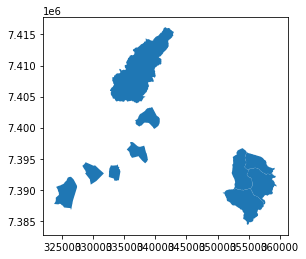

In [8]:
gpd.GeoDataFrame(data=predonimancia_distrito).plot()

In [9]:
gdf_tipos.loc[:, ["ds_codigo", "6"]].sort_values("6", ascending=False)

,ds_codigo,6
10,92,20.567885
71,76,17.495717
72,68,15.157395
9,89,13.663505
38,1,13.409132
...,...,...
54,62,0.183486
75,32,0.162734
56,35,0.118554
57,45,0.040552


In [10]:
gdf_tipos.loc[gdf_tipos["ds_codigo"] == "92", :]

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,0,1,2,3,4,5,6,7,8,9,geometry,qt_total
10,92,VILA MARIA-VILA GUILHERME,07,VMD,VILA MEDEIROS,3.493376,50.054848,0.742553,1.666526,0.0,7.636486,20.567885,0.0,15.175935,0.662391,"POLYGON ((340579.417 7401672.553, 340579.493 7...",23702.0


In [11]:
gdf_tipos.loc[:, ["ds_codigo", "8"]].sort_values("8", ascending=False)

,ds_codigo,8
19,31,37.606157
95,37,32.053041
44,73,31.583254
45,75,30.973585
11,5,30.150021
...,...,...
57,45,0.000000
33,26,0.000000
66,52,0.000000
75,32,0.000000


In [12]:
gdf_tipos.loc[:, ["ds_codigo","9"]].sort_values("9", ascending=False)

,ds_codigo,9
94,47,44.754768
65,30,42.196484
60,83,40.215143
67,55,39.192626
93,57,30.489478
...,...,...
27,66,0.000000
28,69,0.000000
29,78,0.000000
30,7,0.000000


In [13]:
gdf_tipos.loc[gdf_tipos["ds_codigo"] == "30", :]

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,0,1,2,3,4,5,6,7,8,9,geometry,qt_total
65,30,CAPELA DO SOCORRO,19,GRA,GRAJAU,11.131334,0.517063,30.783868,2.924509,0.0,3.75181,1.319545,0.0,7.375388,42.196484,"POLYGON ((331412.267 7374796.393, 331590.932 7...",24175.0
